Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore.csv


Dataset

In [6]:
df =pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Unnamed: 10,Current Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,NaN,1.0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,NaN,2.0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,NaN,1.2.4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,NaN,Varies with device
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,NaN,1.1


Data Cleaning

In [7]:
df.isnull().sum()

App                   0
Category              0
Rating             1474
Reviews               0
Size                  0
Installs              0
Type                  1
Price                 0
Content Rating        1
Genres                0
Unnamed: 10       10841
Current Ver           8
dtype: int64

In [8]:
df.replace(['-1'], [np.nan], inplace=True)
df.replace(['-1.0'], [np.nan], inplace=True)
df.replace([-1], [np.nan], inplace=True)

In [9]:
df['Type'].replace(to_replace=['0'], value=['Free'],inplace=True)
df['Type'].fillna('Free', inplace=True)

Category           Type
1.9                Free      1
ART_AND_DESIGN     Free     62
                   Paid      3
AUTO_AND_VEHICLES  Free     82
                   Paid      3
                          ... 
TRAVEL_AND_LOCAL   Paid     12
VIDEO_PLAYERS      Free    171
                   Paid      4
WEATHER            Free     74
                   Paid      8
Name: Type, Length: 64, dtype: int64


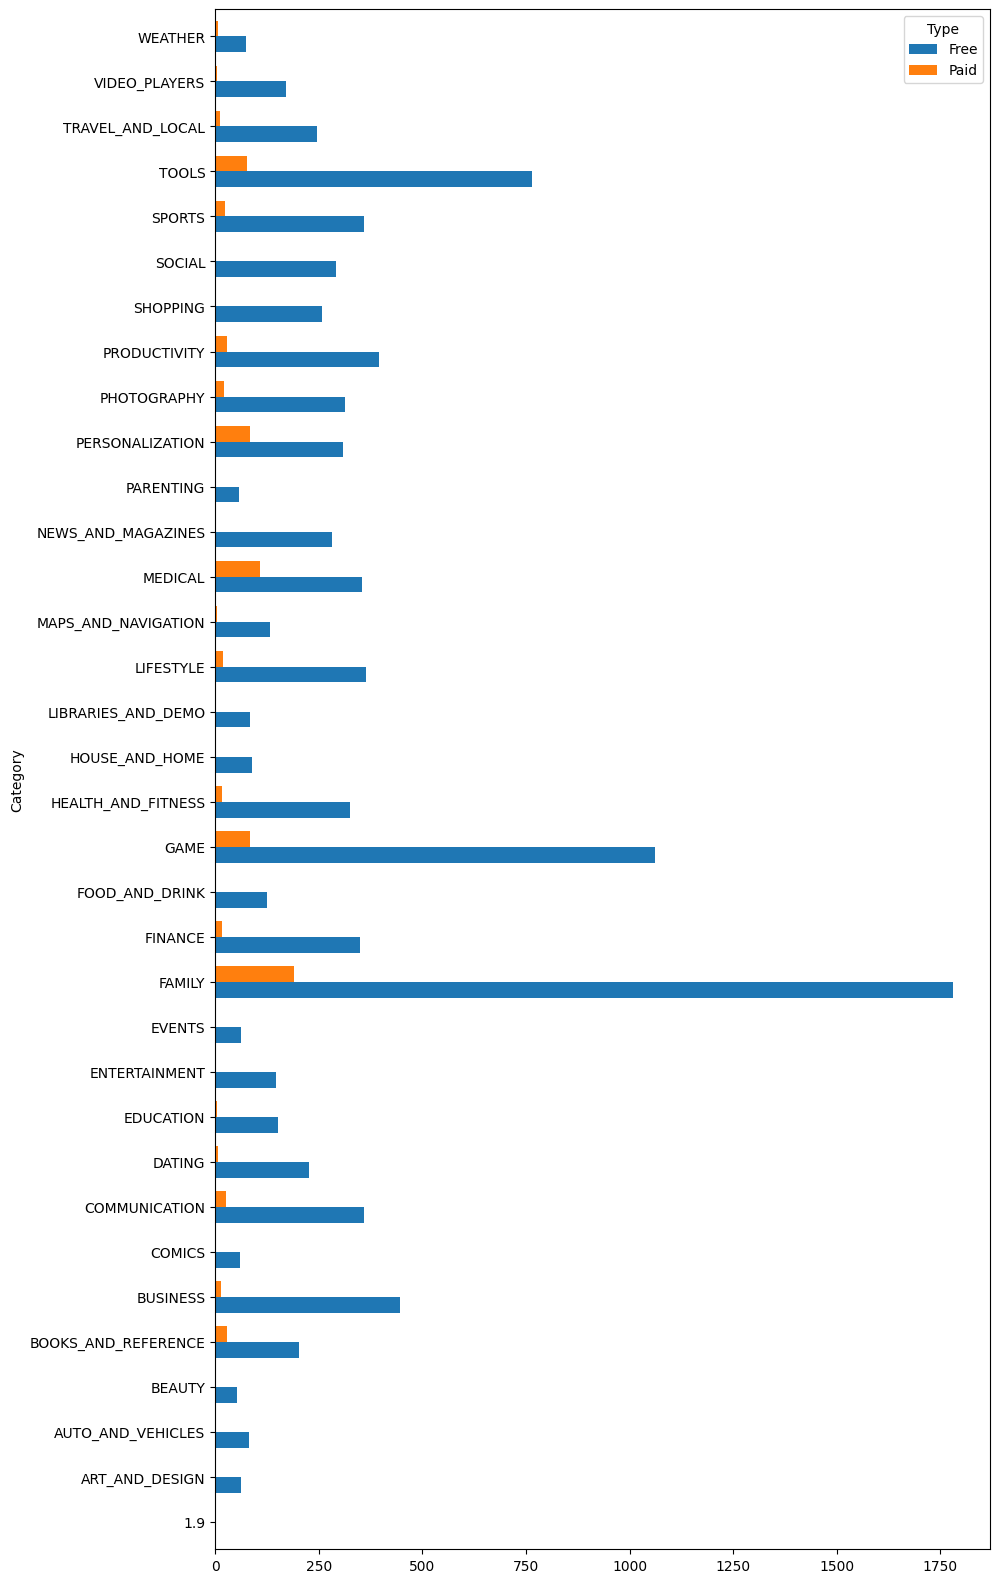

In [10]:
print(df.groupby('Category')['Type'].value_counts())
Type_cat = df.groupby('Category')['Type'].value_counts().unstack().plot.barh(figsize=(10,20), width=0.7)
plt.show()

EDA

<Axes: ylabel='Density'>

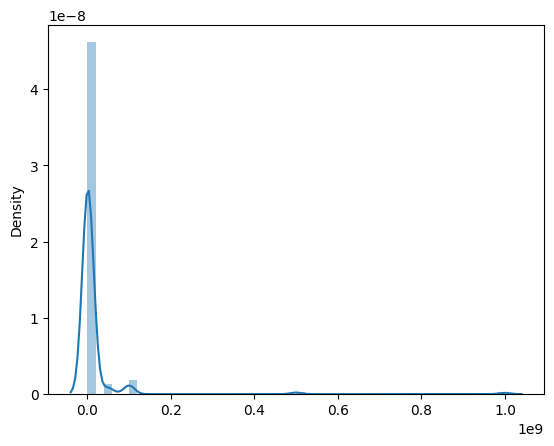

In [12]:
df['Installs'].replace(to_replace=['0', 'Free'], value=['0+','0+'],inplace=True)
Installs = []

for x in df.Installs:
    x = x.replace(',', '')
    Installs.append(x[:-1])

Installs = list(map(float, Installs))
df['installs'] = Installs
sns.distplot(Installs)

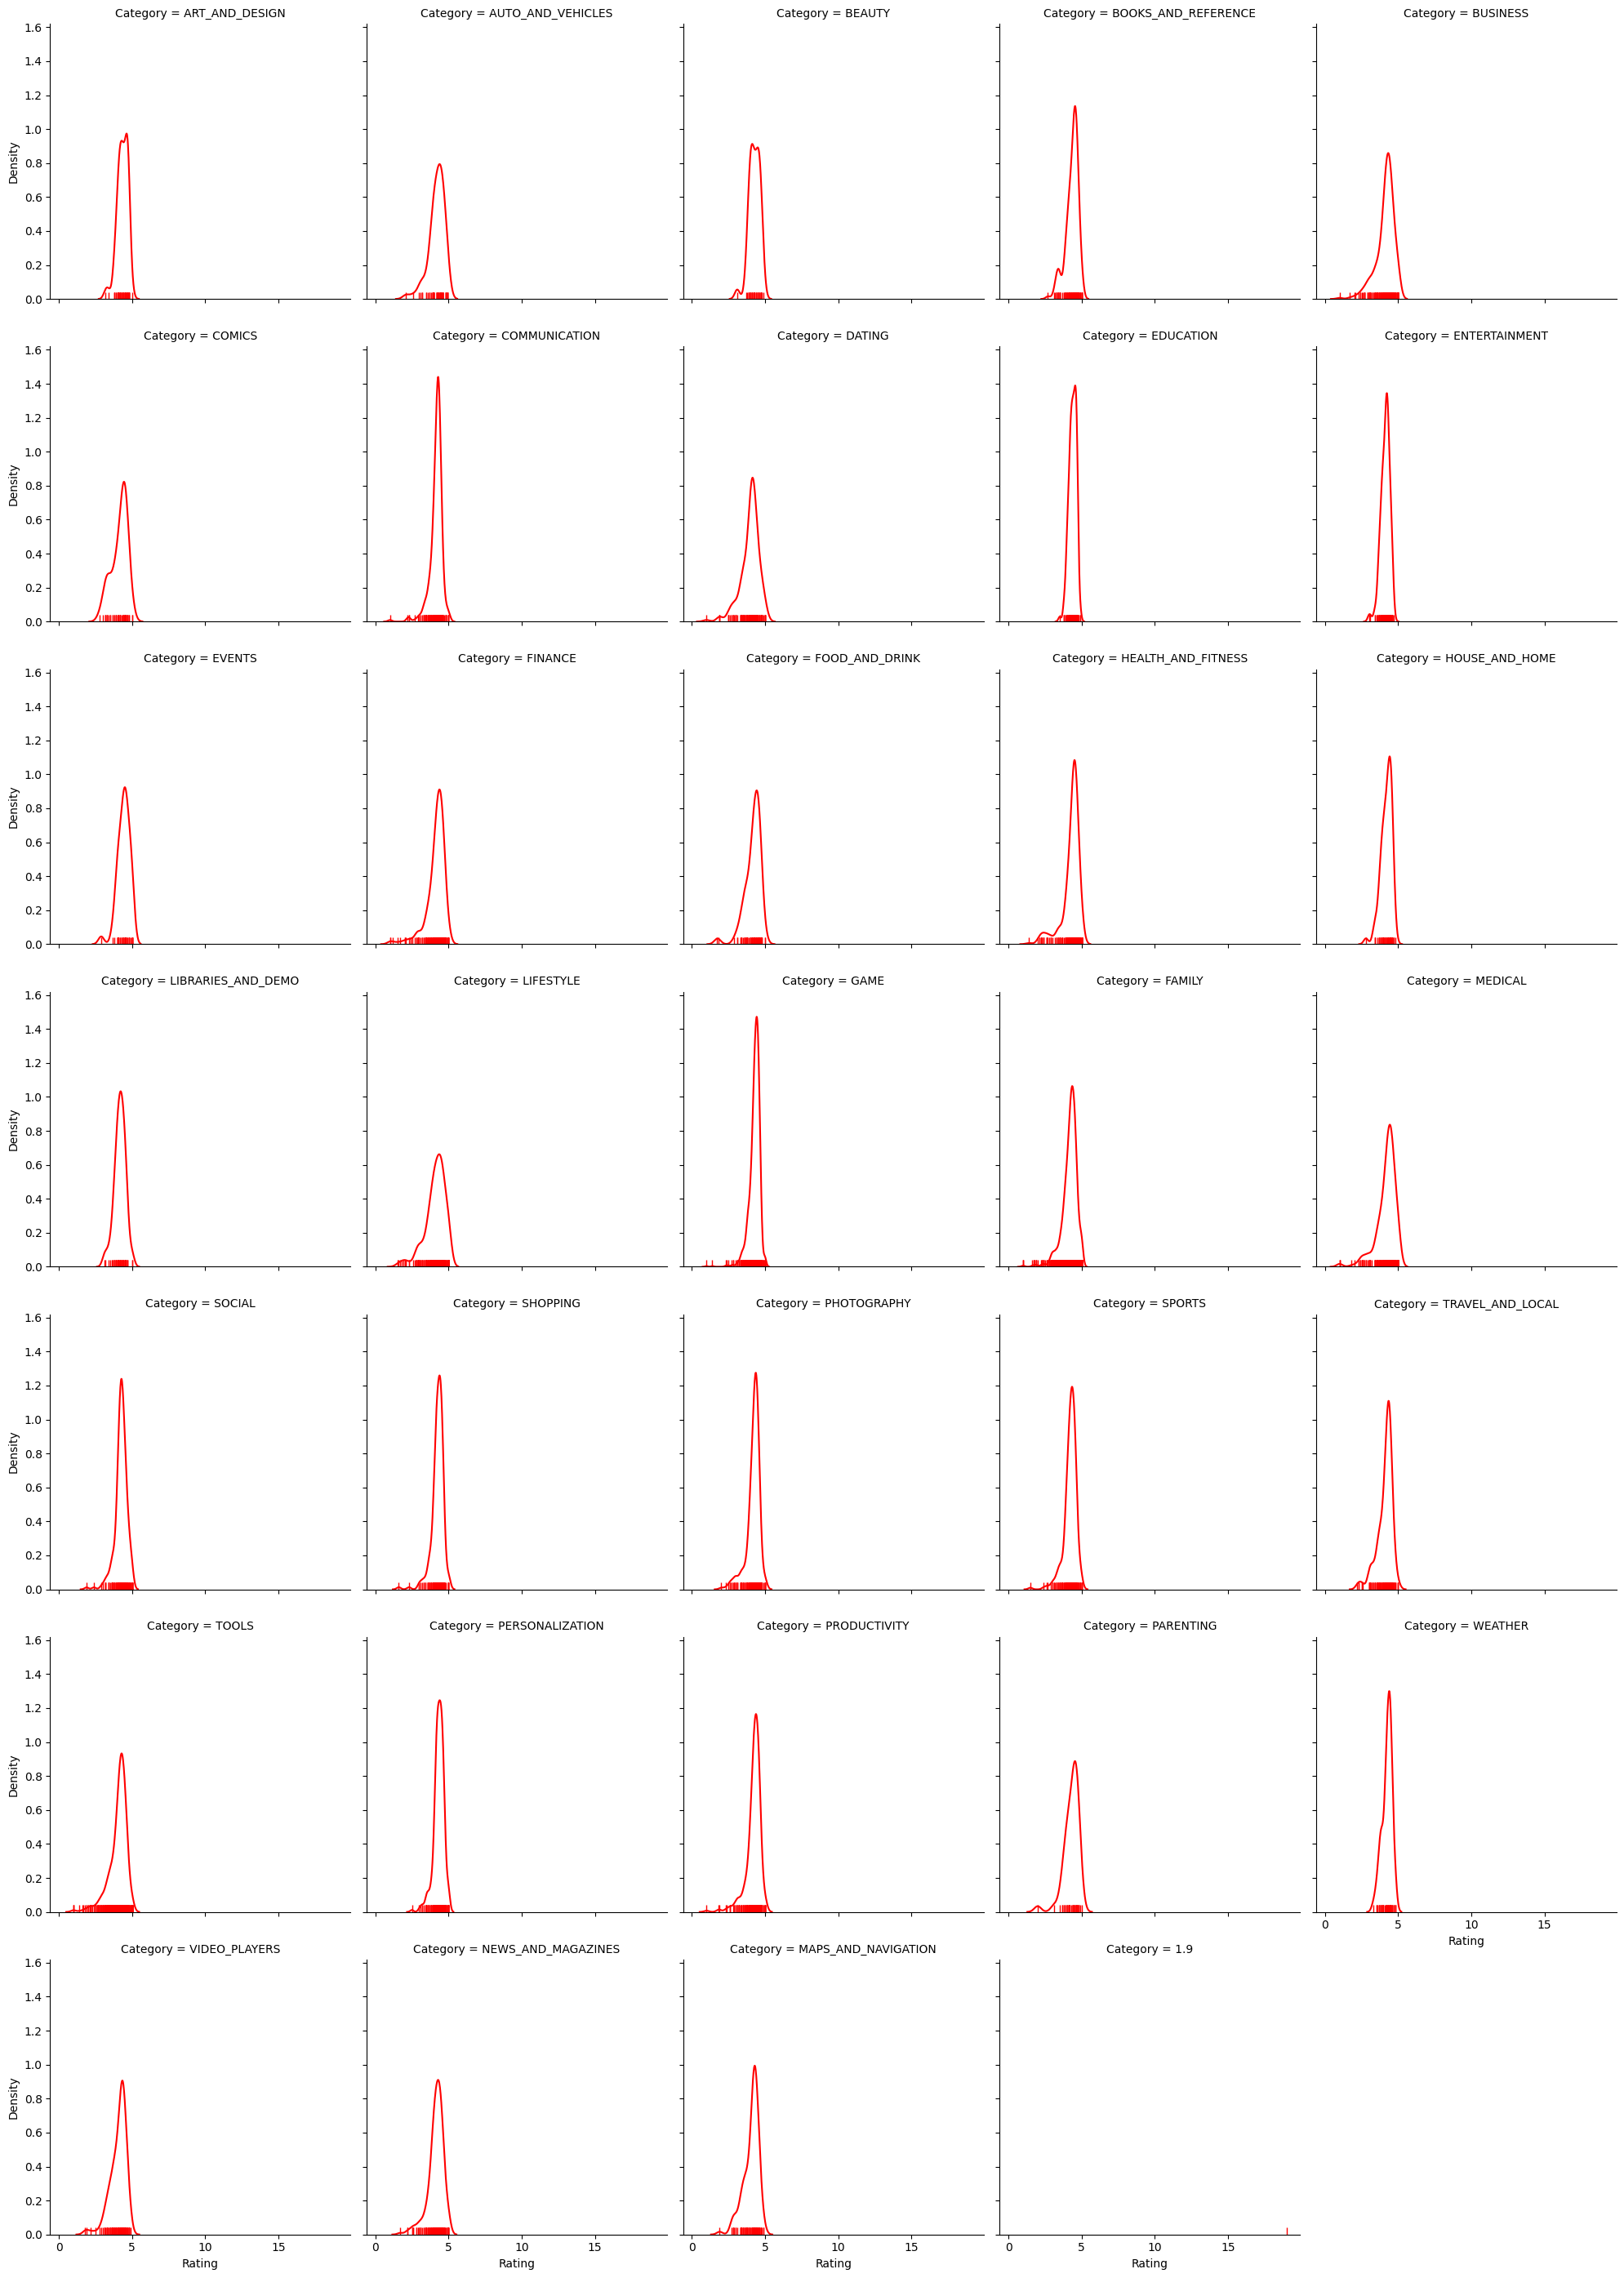

In [13]:
g = sns.FacetGrid(df, col='Category', palette="Set1",  col_wrap=5, height=4)
g = (g.map(sns.distplot, "Rating", hist=False, rug=True, color="r"))

<Axes: xlabel='Rating', ylabel='Density'>

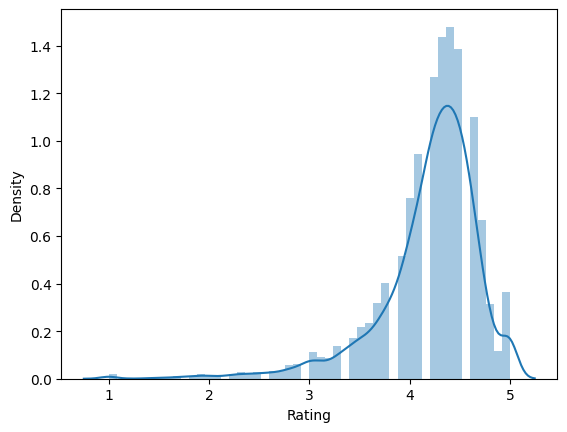

In [14]:
df['Rating'].replace(to_replace=[19.0], value=[1.9],inplace=True)
sns.distplot(df.Rating)

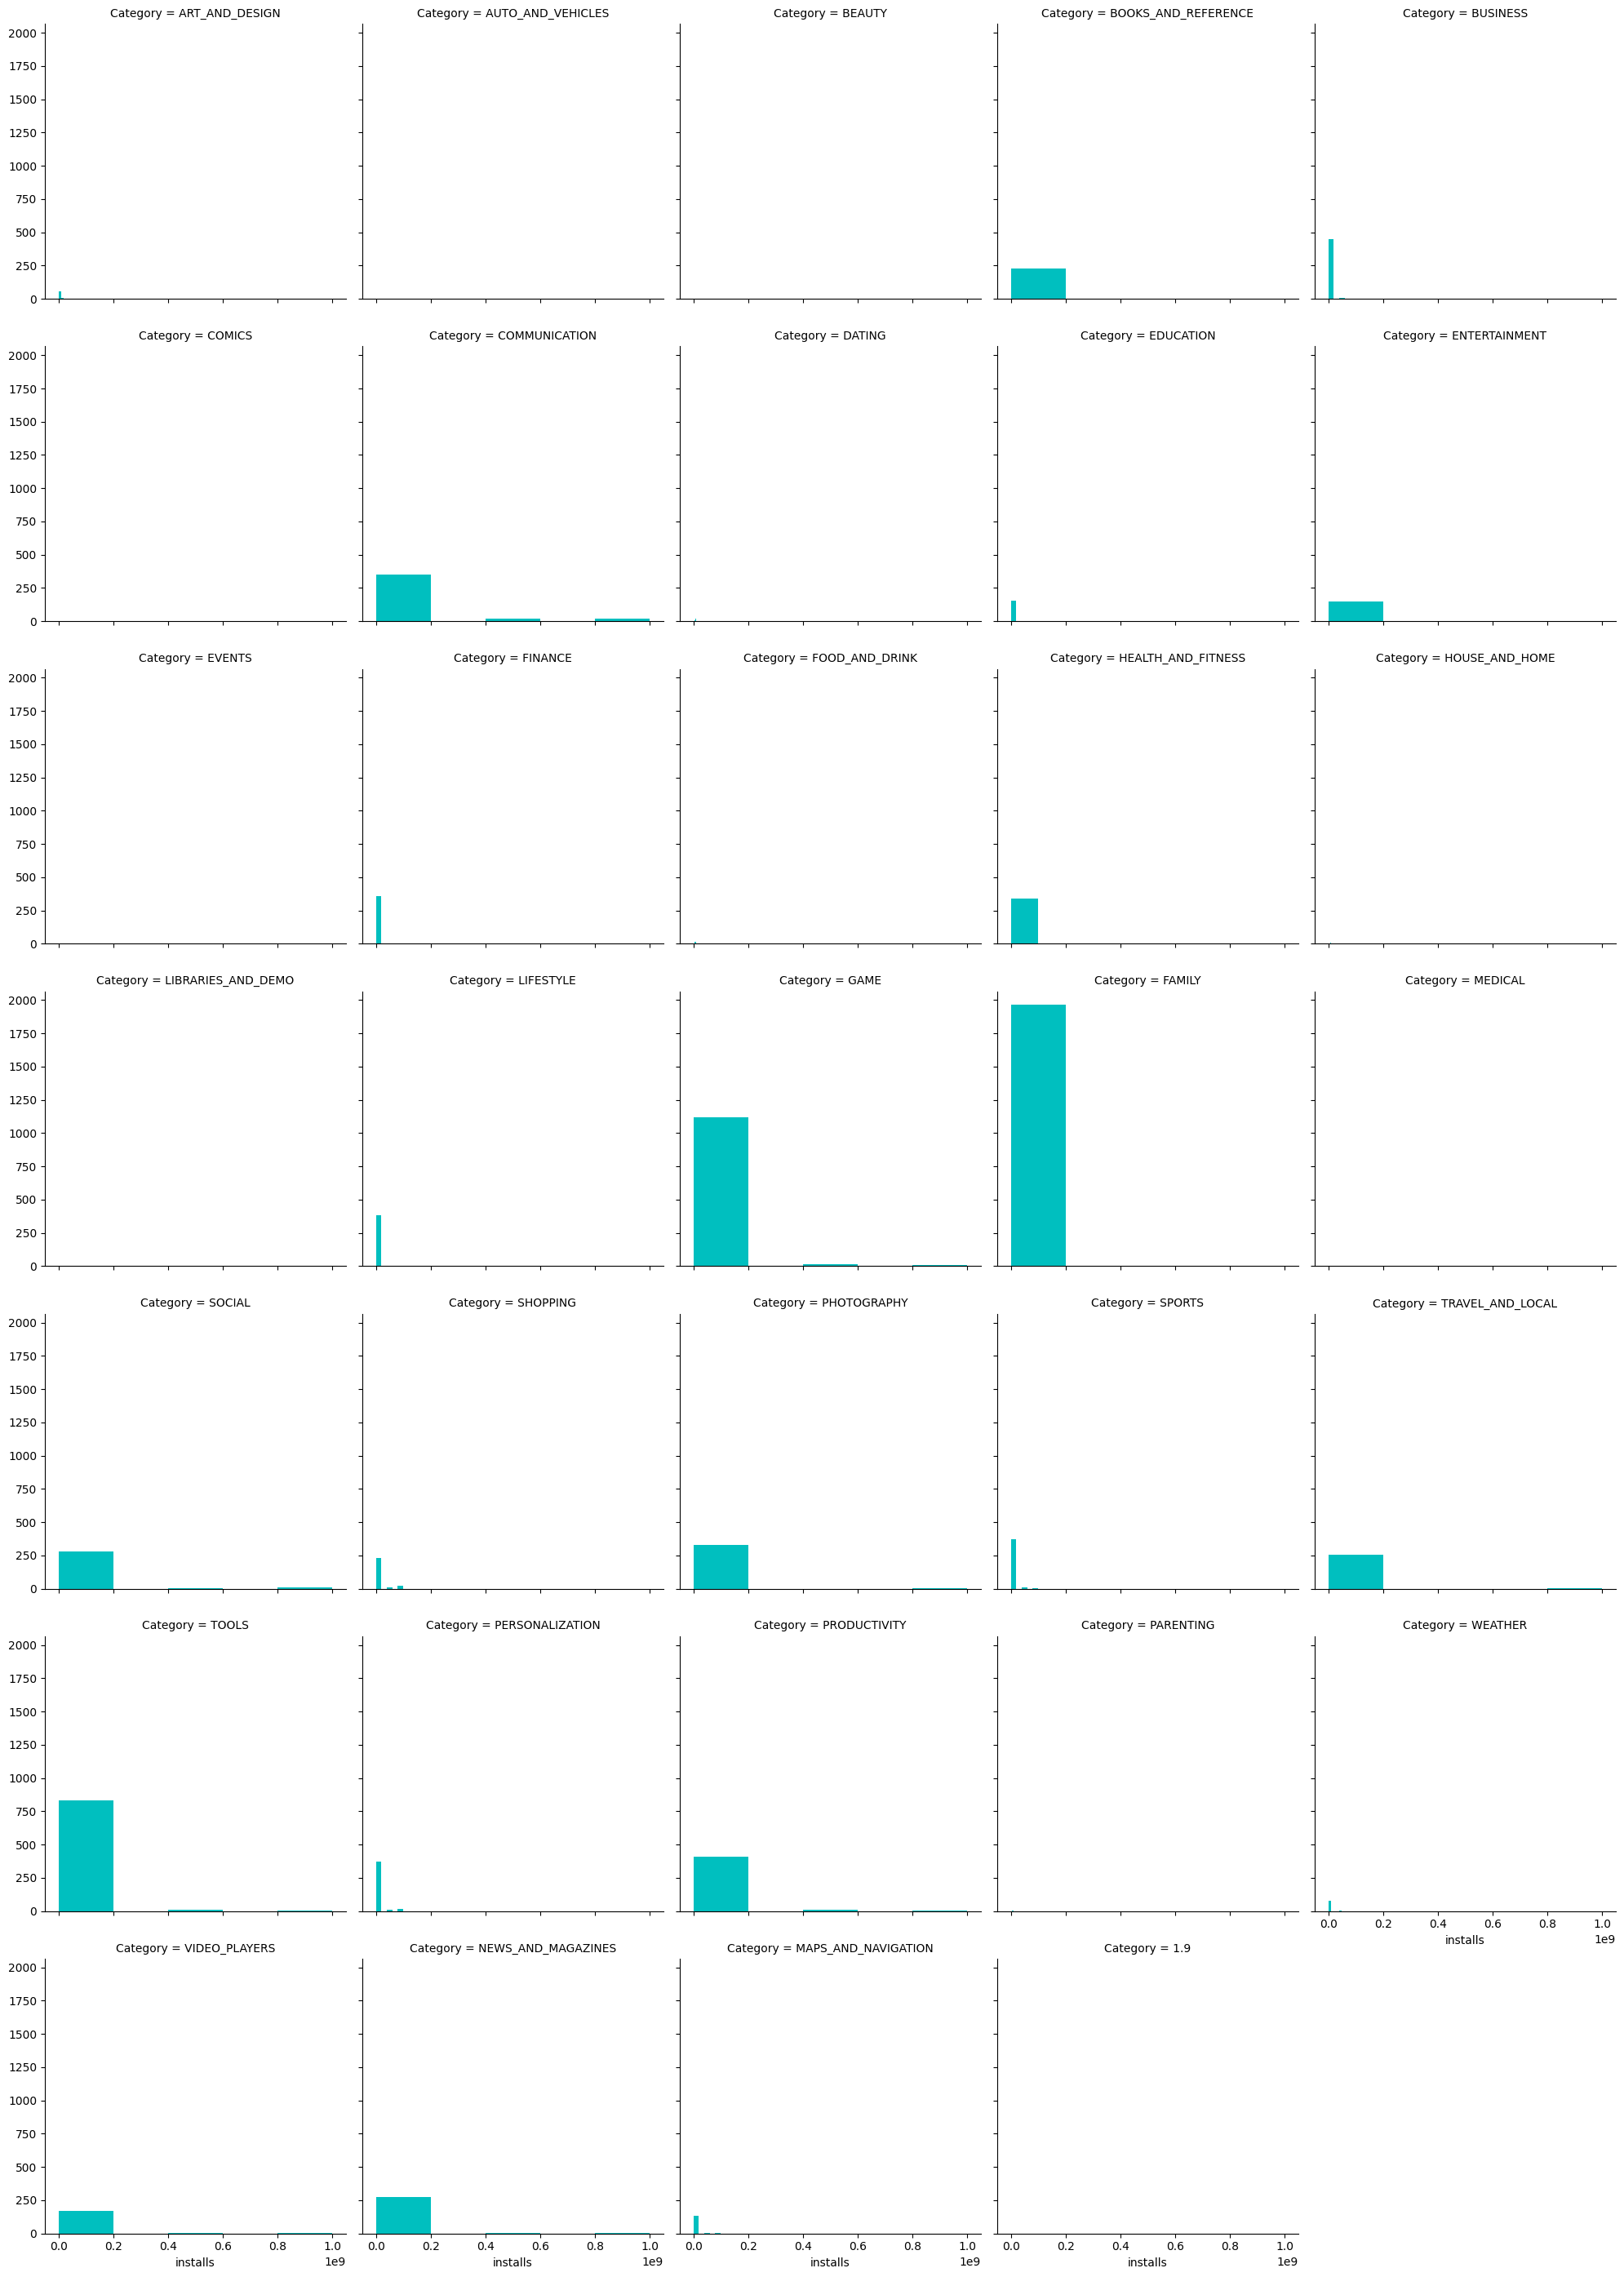

In [15]:
g = sns.FacetGrid(df, col='Category', palette="Set1",  col_wrap=5, height=4)
g = (g.map(plt.hist, "installs", bins=5, color='c'))